<a href="https://colab.research.google.com/github/tejassui/Insurance-Prediction/blob/main/STAT306.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Insurance Charges**

## **Installing Required Packages**

In [1]:
install.packages("car")
install.packages("broom")
install.packages("corrplot")
install.packages("Metrics")
install.packages("leaps")
install.packages("gridExtra")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [99]:
library(car)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(corrplot)
library(gridExtra)
library(leaps)
library(lmtest)
library(broom)
library(Metrics)

## **Data Cleaning**

In [100]:
# reading data
insurance <- read.csv("//content//insurance.csv")
insurance$index <- NULL
insurance

age,sex,bmi,children,smoker,region,charges
<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590
37,female,27.740,3,no,northwest,7281.506
37,male,29.830,2,no,northeast,6406.411


In [101]:
# checking for duplicate values
insurance[duplicated(insurance), ]

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
582,19,male,30.59,0,no,northwest,1639.563


In [102]:
# choosing distinct values only
insurance <- insurance %>% distinct()

In [103]:
# checking for null values
colSums(is.na(insurance))

age      sex      bmi children   smoker   region  charges 
       0        0        0        0        0        0        0

## **Exploratory Data Analysis**

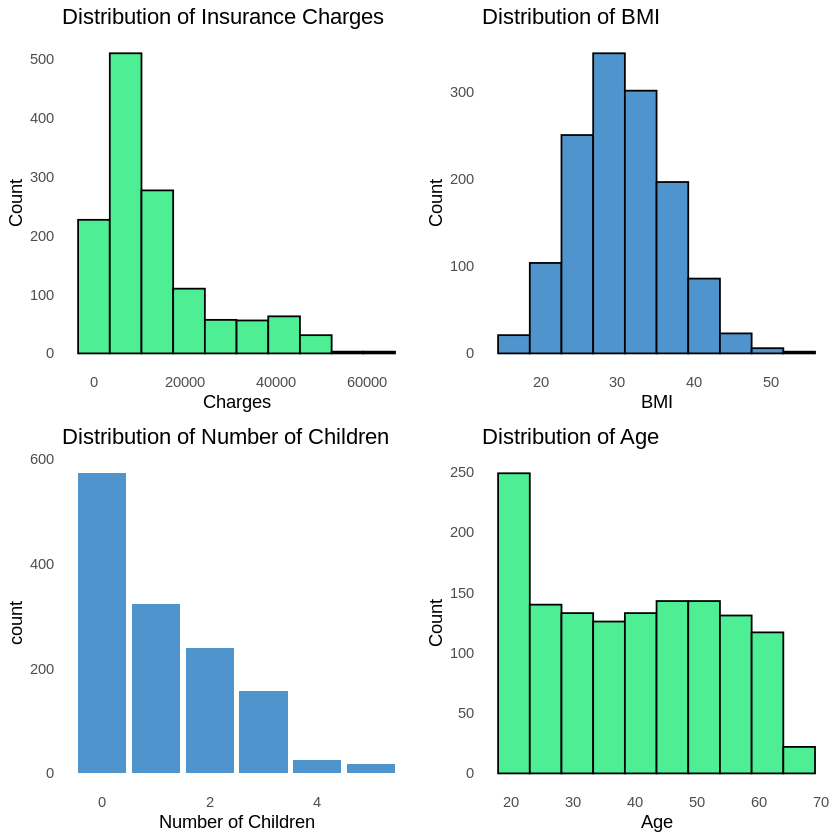

In [104]:
# numeric variables distribution

dc <- ggplot(data = insurance, aes(x = charges)) +
  geom_histogram(bins = 10, fill = "seagreen2", color = "black") +
  labs(title = "Distribution of Insurance Charges", x = "Charges", y = "Count") +
  theme_minimal() +
  theme(panel.grid = element_blank())

db <- ggplot(data = insurance, aes(x = bmi)) +
  geom_histogram(bins = 10, fill = "steelblue3", color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Count")+
  theme_minimal() +
  theme(panel.grid = element_blank())

dnc <- ggplot(insurance, aes(x = children)) +
  geom_bar(fill = 'steelblue3') +
  labs(title = 'Distribution of Number of Children', x = 'Number of Children') +
  theme_minimal() +
  theme(panel.grid = element_blank())


da <- ggplot(data = insurance, aes(x = age)) +
  geom_histogram(bins = 10, fill = "seagreen2", color = "black") +
  labs(title = "Distribution of Age", x = "Age", y = "Count") +
  theme_minimal() +
  theme(panel.grid = element_blank())

grid.arrange(dc,db,dnc,da,ncol=2)

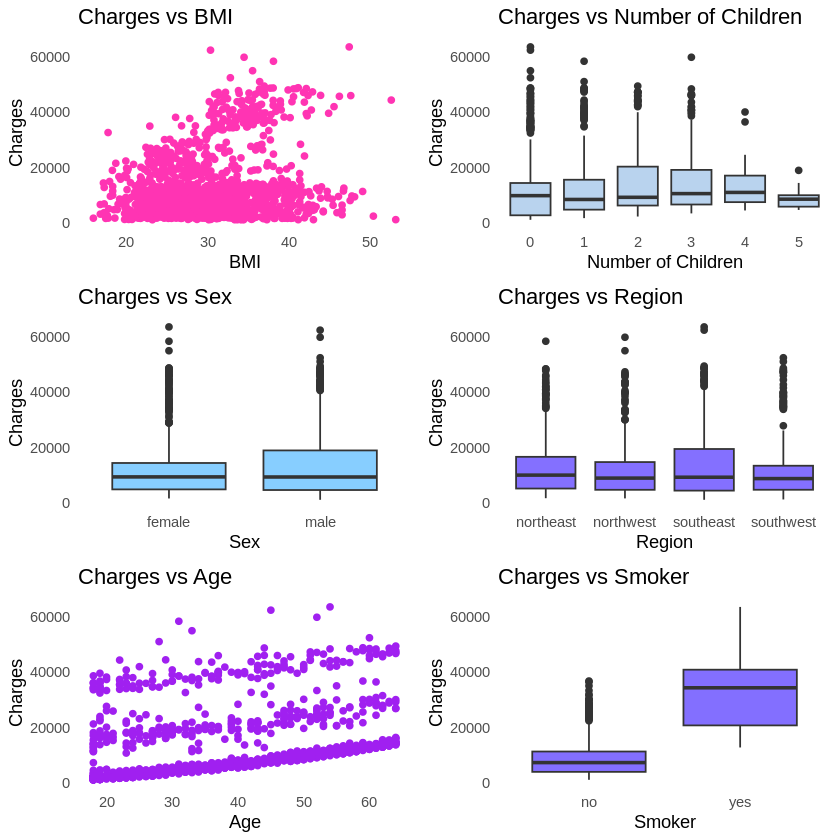

In [105]:
charges_vs_sex <- ggplot(data = insurance, aes(x = sex, y = charges)) +
  geom_boxplot(fill = 'skyblue1') +
  labs(x = "Sex", y = "Charges",  title = 'Charges vs Sex') +
  theme_minimal() +
  theme(panel.grid = element_blank())

# converted bmi into groups for a more comprehensible plot
# bmi groups
# cut_points <- c(0, 18.5, 24.9, 29.9, Inf)
# labels <- c("Underweight", "Normal weight", "Overweight", "Obese")

# insurance$bmi_groups <- cut(insurance$bmi, breaks = cut_points, labels = labels, include.lowest = TRUE)

# charges_vs_bmi <- ggplot(data = insurance, aes(x = bmi_groups, y = charges)) +
#   geom_boxplot(fill = 'skyblue') +
#   labs(x = "BMI Group", y = "Charges", title = 'Charges vs BMI') +
#   theme_minimal() +
#   theme(panel.grid = element_blank()) + theme(axis.text.x = element_text(angle = 10, hjust = 0.5, size = 7))

charges_vs_bmi <- ggplot(data = insurance, aes(x = bmi, y = charges)) +
  geom_point(position = "jitter", col = 'maroon1') +
  labs(x = "BMI", y = "Charges", title = 'Charges vs BMI') +
  theme_minimal() +
  theme(panel.grid = element_blank())

charges_vs_smoker <- ggplot(data = insurance, aes(x = smoker, y = charges)) +
  geom_boxplot(fill = 'slateblue1') +
  labs(x = "Smoker", y = "Charges", title = 'Charges vs Smoker') +
  theme_minimal() +
  theme(panel.grid = element_blank())

charges_vs_children <- ggplot(insurance, aes(x = factor(children), y = charges)) +
  geom_boxplot(fill = "slategray2") +
  labs(x = "Number of Children", y = "Charges", title = 'Charges vs Number of Children') +
  theme_minimal() +
  theme(panel.grid = element_blank())

charges_vs_region <- ggplot(data = insurance, aes(x = region, y = charges)) +
  geom_boxplot(fill = 'lightslateblue') +
  labs(x = "Region", y = "Charges", title = 'Charges vs Region')  +
  theme_minimal() +
  theme(panel.grid = element_blank())

charges_vs_age <- ggplot(data = insurance, aes(x = age, y = charges)) +
  geom_point(col = 'purple') +
  labs(x = "Age", y = "Charges",title = 'Charges vs Age') +
  theme_minimal() +
  theme(panel.grid = element_blank())

grid.arrange(charges_vs_bmi,charges_vs_children,charges_vs_sex,charges_vs_region,charges_vs_age,charges_vs_smoker, ncol = 2, nrow = 3)

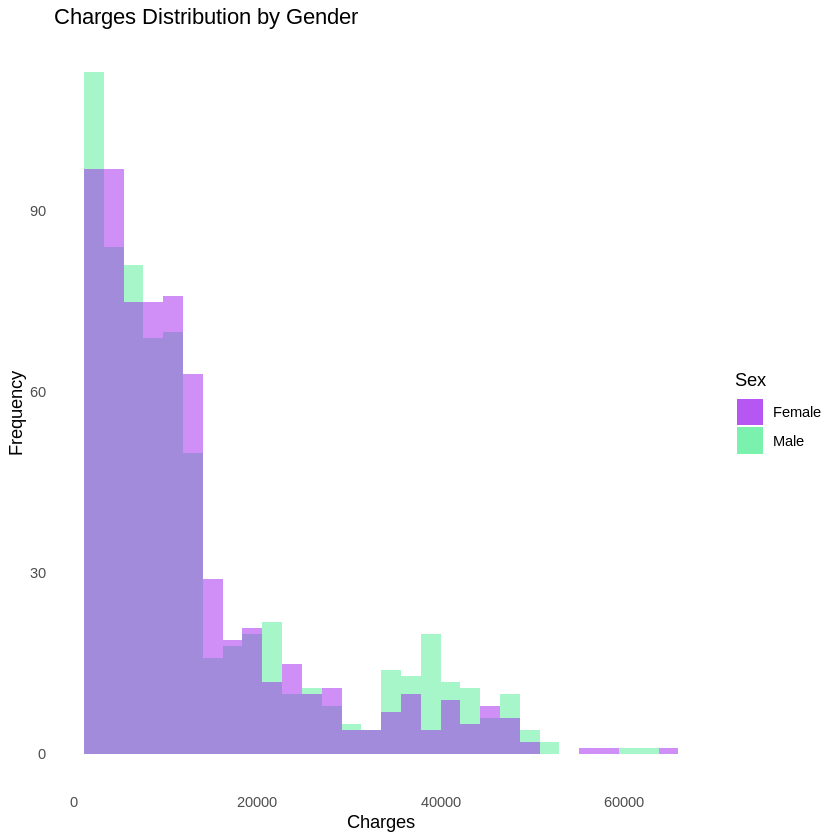

In [106]:
df_male <- subset(insurance, sex == "male")
df_female <- subset(insurance, sex == "female")

ggplot() + geom_histogram(data = df_male, aes(x = charges, fill = "Male"), alpha = 0.5, bins = 30) +
  geom_histogram(data = df_female, aes(x = charges, fill = "Female"), alpha = 0.5, bins = 30) +
  labs(x = "Charges", y = "Frequency", title = "Charges Distribution by Gender")+
  scale_fill_manual(name = "Sex", values = c("Male" = "seagreen2", "Female" = "purple")) +
  theme_minimal() +
  theme(panel.grid = element_blank())

#### Visualising Correlation between Numeric Variables

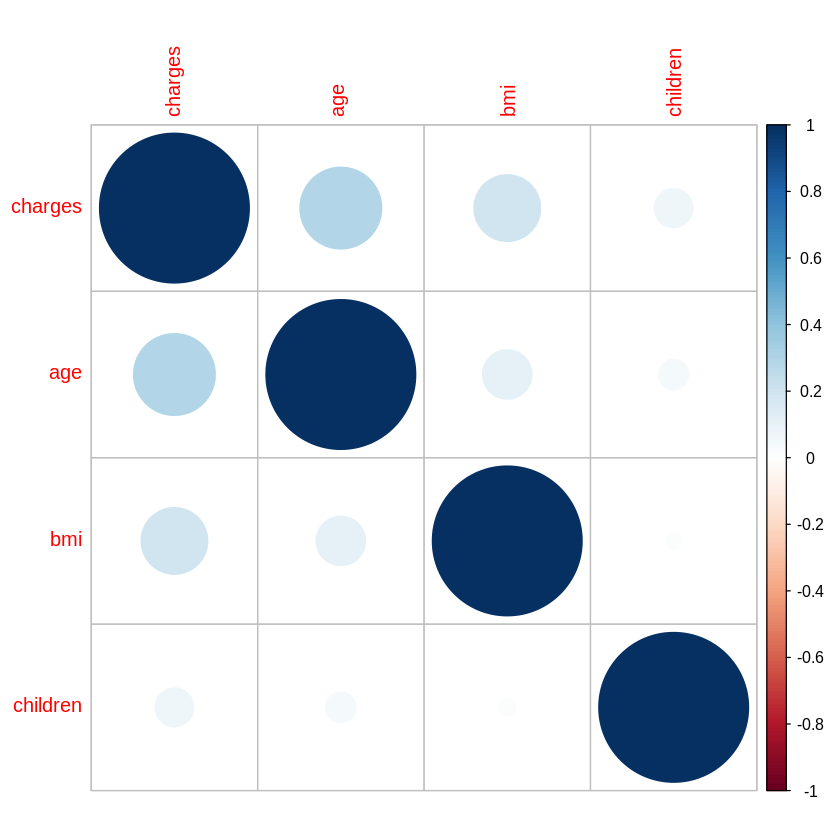

In [107]:
corrplot(cor(insurance[, c('charges', 'age', 'bmi', 'children')]))

In [108]:
round(cor(insurance[, c('charges', 'age', 'bmi', 'children')]), 2)

,charges,age,bmi,children
charges,1.00,0.30,0.20,0.07
age,0.30,1.00,0.11,0.04
bmi,0.20,0.11,1.00,0.01
children,0.07,0.04,0.01,1.00


In [109]:
male <- insurance[insurance$sex == 'male', ]
female <- insurance[insurance$sex == 'female', ]

cat("Male Insurance Charges Average: ", mean(male$charges), "\n")
cat("Female Insurance Charges Average: ", mean(female$charges), "\n")

Male Insurance Charges Average:  13975 
Female Insurance Charges Average:  12569.58 


In [110]:
# proportion of smokers by sex
insurance$smoker_binary <- ifelse(insurance$smoker == "yes", 1, 0)
result <- insurance %>%
  group_by(sex) %>%
  summarise(`Proportion of Smokers` = mean(smoker_binary)) %>%
  ungroup()
result

sex,Proportion of Smokers
<chr>,<dbl>
female,0.1737160
male,0.2355556


#### Multivariable Plots

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


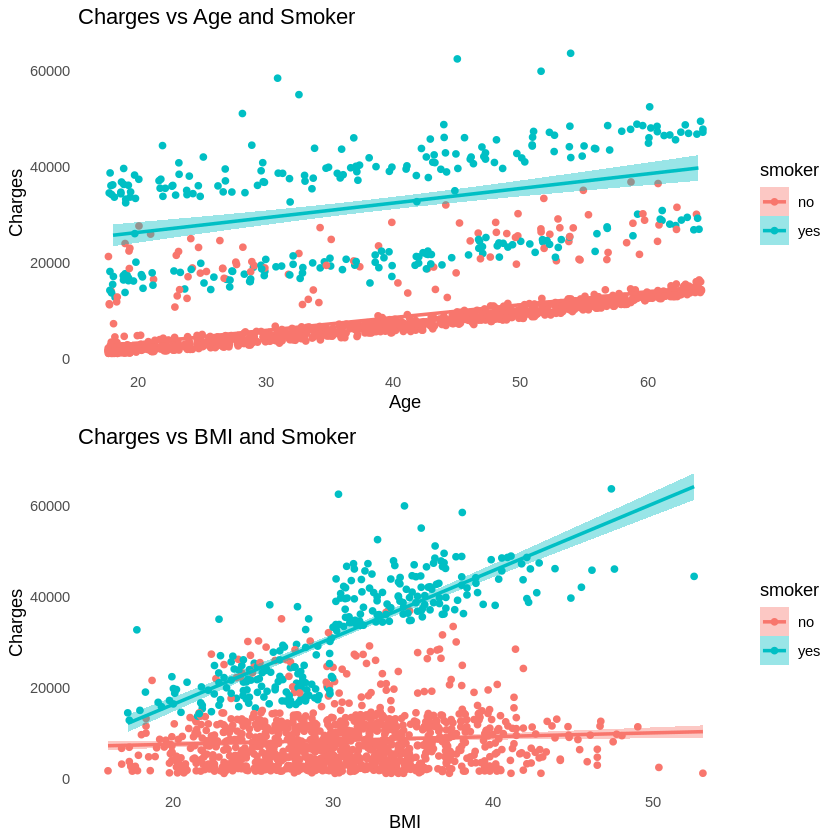

In [111]:
cas <- ggplot(data = insurance, aes(x = age, y = charges, group = smoker, fill = smoker, col = smoker)) +
  geom_point(position = "jitter", fill = 'cyan') + geom_smooth(method = 'lm')+
  labs(x = "Age", y = "Charges", title = 'Charges vs Age and Smoker') +
  theme_minimal() +
  theme(panel.grid = element_blank())



cbbs <- ggplot(data = insurance, aes(x = bmi, y = charges, group = smoker, fill = smoker, col = smoker)) +
  geom_point(position = "jitter", fill = 'cyan') + geom_smooth(method = 'lm') +
  labs(x = "BMI", y = "Charges", title = 'Charges vs BMI and Smoker') +
  theme_minimal() +
  theme(panel.grid = element_blank())

grid.arrange(cas,cbbs,nrow=2)

## **Linear Regression Models and Analysis**

In [112]:
# one-hot encoding categorical variables and standardizing numeric variables
insurance$std_age <- scale(insurance$age)
insurance$std_bmi <- scale(insurance$bmi)

# 75-25 train-test split
data_train <- insurance[1:1000,]
data_test <- insurance[1001:nrow(insurance),]

#### Subset Selection for Additive Model

In [113]:
s <- regsubsets(charges~std_bmi+std_age+smoker_binary+region+sex+children, data = data_train, method = "exhaustive")
ss <- summary(s)
ss
ss$adjr2
ss$cp

Subset selection object
Call: regsubsets.formula(charges ~ std_bmi + std_age + smoker_binary + 
    region + sex + children, data = data_train, method = "exhaustive")
8 Variables  (and intercept)
                Forced in Forced out
std_bmi             FALSE      FALSE
std_age             FALSE      FALSE
smoker_binary       FALSE      FALSE
regionnorthwest     FALSE      FALSE
regionsoutheast     FALSE      FALSE
regionsouthwest     FALSE      FALSE
sexmale             FALSE      FALSE
children            FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         std_bmi std_age smoker_binary regionnorthwest regionsoutheast
1  ( 1 ) " "     " "     "*"           " "             " "            
2  ( 1 ) " "     "*"     "*"           " "             " "            
3  ( 1 ) "*"     "*"     "*"           " "             " "            
4  ( 1 ) "*"     "*"     "*"           " "             " "            
5  ( 1 ) "*"     "*"     "*"           " "           

[1] 0.6135281 0.7253382 0.7514310 0.7528426 0.7532019 0.7541519 0.7541034
[8] 0.7540139

[1] 571.970309 119.224711  14.458273   9.737868   9.281248   6.442613   7.638988
[8]   9.000000

#### Additive Model Chosen



In [114]:
model_chosen <- lm(charges~smoker_binary + std_age + std_bmi + children + region, data=data_train)
summary(model_chosen)
glance(model_chosen)


Call:
lm(formula = charges ~ smoker_binary + std_age + std_bmi + children + 
    region, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11046.7  -2787.1   -883.7   1263.8  25480.5 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8588.4      429.8  19.980   <2e-16 ***
smoker_binary    23747.4      473.7  50.133   <2e-16 ***
std_age           3723.2      188.3  19.768   <2e-16 ***
std_bmi           2080.8      198.8  10.466   <2e-16 ***
children           399.6      157.1   2.545   0.0111 *  
regionnorthwest   -487.9      544.2  -0.897   0.3701    
regionsoutheast  -1287.8      535.1  -2.407   0.0163 *  
regionsouthwest  -1268.5      538.0  -2.358   0.0186 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5941 on 992 degrees of freedom
Multiple R-squared:  0.7558,	Adjusted R-squared:  0.7541 
F-statistic: 438.7 on 7 and 992 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7558264,0.7541034,5941.242,438.669,1.645423e-298,7,-10104.6,20227.19,20271.36,35015975407,992,1000


#### Models with Health Attributes

In [115]:
# Additive Model with Health Attributes
add_model <- lm(charges ~ std_age + smoker_binary + std_bmi, data=data_train)
summary(add_model)
glance(add_model)


Call:
lm(formula = charges ~ std_age + smoker_binary + std_bmi, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12157.2  -2851.0   -921.1   1421.4  26389.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8246.3      211.0   39.08   <2e-16 ***
std_age         3754.3      189.0   19.86   <2e-16 ***
smoker_binary  23731.1      475.0   49.96   <2e-16 ***
std_bmi         1971.8      191.8   10.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5973 on 996 degrees of freedom
Multiple R-squared:  0.7522,	Adjusted R-squared:  0.7514 
F-statistic:  1008 on 3 and 996 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.7521774,0.751431,5973.44,1007.668,4.186672e-301,3,-10112.01,20234.03,20258.56,35539262318,996,1000


In [116]:
# Model with Interaction Effects between Smoker and Age, Smoker and BMI
int_model <- lm(charges~smoker_binary*std_age + smoker_binary*std_bmi, data=data_train)
summary(int_model)
glance(int_model)


Call:
lm(formula = charges ~ smoker_binary * std_age + smoker_binary * 
    std_bmi, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10112.9  -1944.9  -1228.2   -234.5  24712.1 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8318.03     167.54  49.649   <2e-16 ***
smoker_binary         23659.77     377.15  62.733   <2e-16 ***
std_age                3893.27     166.38  23.400   <2e-16 ***
std_bmi                  29.92     172.27   0.174    0.862    
smoker_binary:std_age  -233.80     385.46  -0.607    0.544    
smoker_binary:std_bmi  8912.89     368.69  24.174   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4742 on 994 degrees of freedom
Multiple R-squared:  0.8441,	Adjusted R-squared:  0.8434 
F-statistic:  1077 on 5 and 994 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.844134,0.84335,4742.051,1076.655,0,5,-9880.154,19774.31,19808.66,22352122565,994,1000


In [117]:
# Model with Transformation and Interactions
tf_model <- lm(log(charges) ~ smoker_binary*std_bmi + smoker_binary*std_age, data=data_train)
summary(tf_model)
glance(tf_model)


Call:
lm(formula = log(charges) ~ smoker_binary * std_bmi + smoker_binary * 
    std_age, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82443 -0.18691 -0.06235  0.08240  2.29564 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8.7652694  0.0139909 626.498   <2e-16 ***
smoker_binary          1.5355648  0.0314957  48.755   <2e-16 ***
std_bmi                0.0003831  0.0143862   0.027    0.979    
std_age                0.6072587  0.0138940  43.707   <2e-16 ***
smoker_binary:std_bmi  0.2982001  0.0307894   9.685   <2e-16 ***
smoker_binary:std_age -0.4780741  0.0321891 -14.852   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.396 on 994 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8153 
F-statistic:   883 on 5 and 994 DF,  p-value: < 2.2e-16


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8162402,0.8153159,0.3960049,883.0471,0,5,-489.6008,993.2015,1027.556,155.879,994,1000


In [118]:
# Polynomial Model
poly_model <- lm(charges~smoker_binary*std_age + smoker_binary*std_bmi + I(std_age^2) + I(std_bmi^2), data=data_train)
summary(poly_model)
glance(poly_model)


Call:
lm(formula = charges ~ smoker_binary * std_age + smoker_binary * 
    std_bmi + I(std_age^2) + I(std_bmi^2), data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9507.2 -1902.0 -1290.3  -218.6 24214.9 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            8187.14     265.68  30.816   <2e-16 ***
smoker_binary         23719.61     376.43  63.013   <2e-16 ***
std_age                3853.82     166.39  23.162   <2e-16 ***
std_bmi                  99.85     175.79   0.568   0.5702    
I(std_age^2)            353.69     170.79   2.071   0.0386 *  
I(std_bmi^2)           -244.28     115.58  -2.114   0.0348 *  
smoker_binary:std_age  -256.83     384.33  -0.668   0.5041    
smoker_binary:std_bmi  8892.53     367.62  24.189   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4726 on 992 degrees of freedom
Multiple R-squared:  0.8455,	Adjusted R-squared:  0.8444 
F-stati

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.845495,0.8444047,4726.06,775.5004,0,7,-9875.77,19769.54,19813.71,22156957123,992,1000


#### Calculating RMSEs

In [119]:
# prediction add_model
prediction1 <- predict(add_model, newdata = data_test)
# RMSE of add_model
cat("The RMSE of model 1 is:", rmse(prediction1, data_test$charges), "\n")

#prediction int_model
prediction2 <- predict(int_model, newdata = data_test)
# RMSE of int_model
cat("The RMSE of model 2 is:", rmse(prediction2, data_test$charges), "\n")

#prediction tf_model
prediction3 <- predict(tf_model, newdata = data_test)
# RMSE of tf_model
cat("The RMSE of model 3 is:", rmse(prediction3, data_test$charges), "\n")

#prediction poly_model
prediction4 <- predict(poly_model, newdata = data_test)
# RMSE of poly_model
cat("The RMSE of model 4 is:", rmse(prediction4, data_test$charges))

The RMSE of model 1 is: 6451.997 
The RMSE of model 2 is: 5391.474 
The RMSE of model 3 is: 18618.09 
The RMSE of model 4 is: 5321.946

## **Model Assumptions**

#### Linearity

$title
[1] "Residuals vs. Fitted Values"

attr(,"class")
[1] "labels"

$title
[1] "Residuals vs. Fitted Values"

attr(,"class")
[1] "labels"

$title
[1] "Residuals vs. Fitted Values"

attr(,"class")
[1] "labels"

$title
[1] "Residuals vs. Fitted Values"

attr(,"class")
[1] "labels"

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


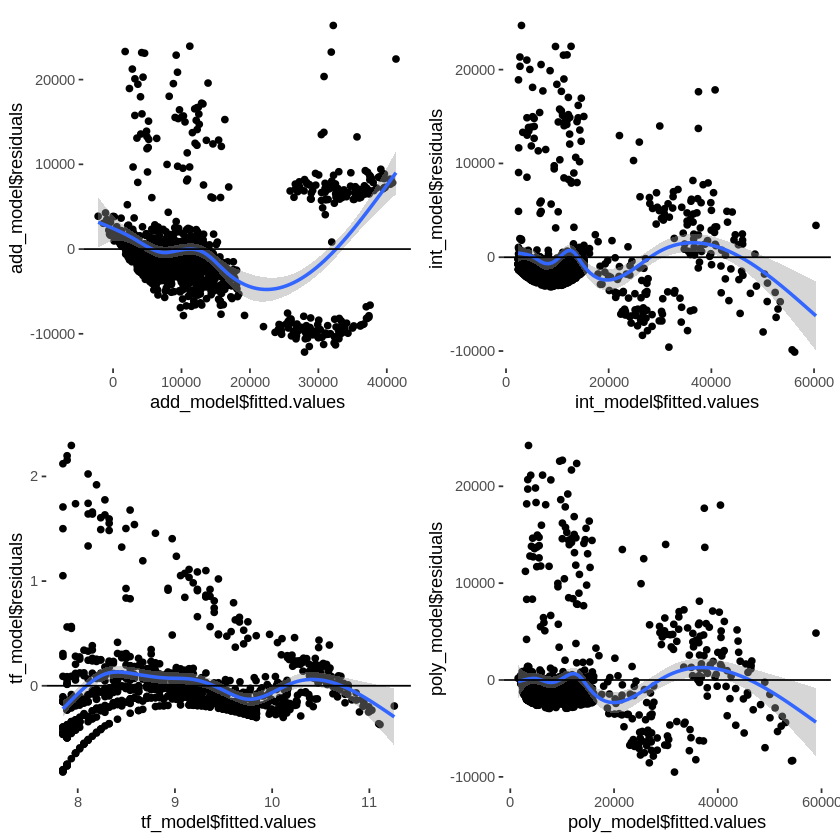

In [120]:
resid_fitted2 <- ggplot(int_model, aes(x=int_model$fitted.values, y=int_model$residuals)) +
  geom_point() + geom_smooth() + geom_hline(aes(yintercept = 0)) +
    theme(panel.grid = element_blank(), panel.background = element_blank())
  ggtitle('Residuals vs. Fitted Values')

resid_fitted3 <- ggplot(int_model, aes(x=tf_model$fitted.values, y=tf_model$residuals)) +
  geom_point() + geom_smooth() + geom_hline(aes(yintercept = 0)) +
    theme(panel.grid = element_blank(), panel.background = element_blank())
  ggtitle('Residuals vs. Fitted Values')

resid_fitted4 <- ggplot(int_model, aes(x=poly_model$fitted.values, y=poly_model$residuals)) +
geom_point() + geom_smooth() + geom_hline(aes(yintercept = 0)) +
  theme(panel.grid = element_blank(), panel.background = element_blank())
ggtitle('Residuals vs. Fitted Values')

resid_fitted <- ggplot(int_model, aes(x=add_model$fitted.values, y=add_model$residuals)) +
geom_point() + geom_smooth() + geom_hline(aes(yintercept = 0)) +
  theme(panel.grid = element_blank(), panel.background = element_blank())
ggtitle('Residuals vs. Fitted Values')

grid.arrange(resid_fitted, resid_fitted2,resid_fitted3,resid_fitted4, ncol = 2, nrow = 2)

#### Normality


	Shapiro-Wilk normality test

data:  add_model$residuals
W = 0.89833, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  tf_model$residuals
W = 0.76049, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  int_model$residuals
W = 0.66576, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  poly_model$residuals
W = 0.66236, p-value < 2.2e-16


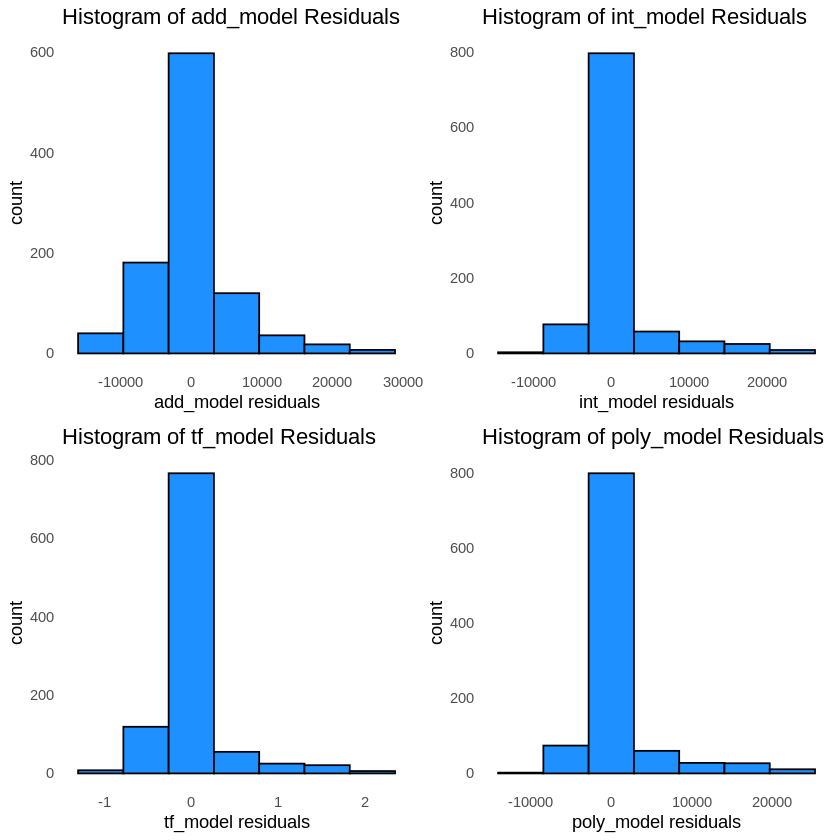

In [121]:
h1 <- ggplot(data = data.frame(residuals = add_model$residuals)) +
  geom_histogram(aes(x = residuals), bins = 7, fill = "dodgerblue", color = "black") +
  labs(title = "Histogram of add_model Residuals",
       x = "add_model residuals",
       y = "count") +
  theme_minimal() + theme(panel.grid = element_blank())
h2 <- ggplot(data = data.frame(residuals = int_model$residuals)) +
  geom_histogram(aes(x = residuals), bins = 7, fill = "dodgerblue", color = "black") +
  labs(title = "Histogram of int_model Residuals",
       x = "int_model residuals",
       y = "count") +
  theme_minimal() + theme(panel.grid = element_blank())
h3 <- ggplot(data = data.frame(residuals = tf_model$residuals)) +
  geom_histogram(aes(x = residuals), bins = 7, fill = "dodgerblue", color = "black") +
  labs(title = "Histogram of tf_model Residuals",
       x = "tf_model residuals",
       y = "count") +
  theme_minimal() + theme(panel.grid = element_blank())
h4 <- ggplot(data = data.frame(residuals = poly_model$residuals)) +
  geom_histogram(aes(x = residuals), bins = 7, fill = "dodgerblue", color = "black") +
  labs(title = "Histogram of poly_model Residuals",
       x = "poly_model residuals",
       y = "count") +
  theme_minimal() + theme(panel.grid = element_blank())

shapiro.test(add_model$residuals)
shapiro.test(tf_model$residuals)
shapiro.test(int_model$residuals)
shapiro.test(poly_model$residuals)
grid.arrange(h1,h2,h3,h4,ncol=2,nrow=2)

#### Multicollinearity

In [122]:
vif(add_model)
vif(int_model, type = "predictor")
vif(tf_model, type = "predictor")
vif(poly_model, type = "predictor")

std_age smoker_binary       std_bmi 
     1.013925      1.000269      1.014129

GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
smoker_binary,1.000000,5,1.000000,"std_age, std_bmi",--
std_age,1.022454,3,1.003708,smoker_binary,std_bmi
std_bmi,1.022534,3,1.003721,smoker_binary,std_age


GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
smoker_binary,1.000000,5,1.000000,"std_bmi, std_age",--
std_bmi,1.022534,3,1.003721,smoker_binary,std_age
std_age,1.022454,3,1.003708,smoker_binary,std_bmi


GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
smoker_binary,1.000000,7,1.000000,"std_age, std_bmi",--
std_age,1.027223,4,1.003363,"I(std_age^2), smoker_binary",std_bmi
std_bmi,1.026981,4,1.003334,"I(std_bmi^2), smoker_binary",std_age


#### Homoscedasticity

```
Null Hypothesis: Homoscedasticity
Alternate Hypothesis: Heteroscedasticity
```

In [123]:
bptest(add_model)
bptest(int_model)
bptest(tf_model)
bptest(poly_model)


	studentized Breusch-Pagan test

data:  add_model
BP = 88.47, df = 3, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  int_model
BP = 3.3559, df = 5, p-value = 0.6453



	studentized Breusch-Pagan test

data:  tf_model
BP = 57.788, df = 5, p-value = 3.478e-11



	studentized Breusch-Pagan test

data:  poly_model
BP = 5.4172, df = 7, p-value = 0.6092



##### **Author: Tejasvi Kathuria (Group B6)**

